In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
eda_data = pd.read_csv("df_train_cleaned.csv",index_col=0)
eda_data.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender
0,16,2.6,1.2,236,131,90,5.4,2.6,0.9,1,1
1,40,0.9,0.3,293,232,245,6.8,3.1,0.8,1,2
2,60,2.6,1.2,171,42,37,5.4,2.7,1.0,1,1
3,36,2.8,1.5,305,28,76,5.9,2.5,0.7,1,1
4,55,0.8,0.2,290,139,87,7.0,3.0,0.7,1,1


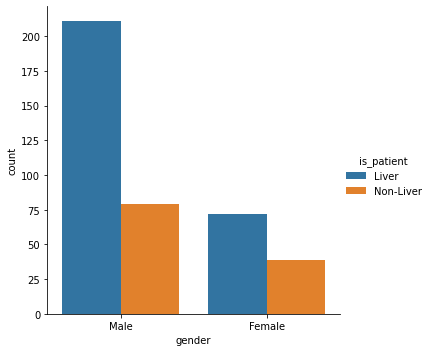

In [4]:
eda_catplot = eda_data.copy()
eda_catplot.loc[eda_catplot['gender']==1,'gender'] ="Male"
eda_catplot.loc[eda_catplot['gender']==2,'gender'] ="Female"
eda_catplot.loc[eda_catplot['is_patient']==1,'is_patient']="Liver"
eda_catplot.loc[eda_catplot['is_patient']==2,'is_patient']="Non-Liver"
sns.catplot(x ="gender", hue ="is_patient",kind ="count", data = eda_catplot)


In [5]:
eda_data.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender
0,16,2.6,1.2,236,131,90,5.4,2.6,0.9,1,1
1,40,0.9,0.3,293,232,245,6.8,3.1,0.8,1,2
2,60,2.6,1.2,171,42,37,5.4,2.7,1.0,1,1
3,36,2.8,1.5,305,28,76,5.9,2.5,0.7,1,1
4,55,0.8,0.2,290,139,87,7.0,3.0,0.7,1,1


In [6]:
eda_y = eda_data.is_patient    
eda_y

0      1
1      1
2      1
3      1
4      1
      ..
396    1
397    1
398    1
399    1
400    1
Name: is_patient, Length: 401, dtype: int64

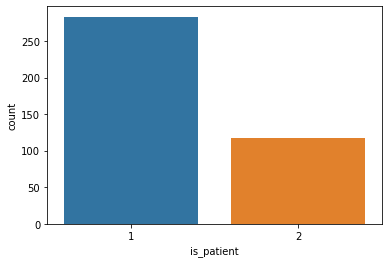

In [8]:
eda_y.loc[eda_y==1][0] = "Liver"
eda_y.loc[eda_y==2][0] = "Non-liver"
ax = sns.countplot(x = eda_y,label="Count")

In [9]:
eda_data

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender
0,16,2.6,1.2,236,131,90,5.4,2.6,0.9,1,1
1,40,0.9,0.3,293,232,245,6.8,3.1,0.8,1,2
2,60,2.6,1.2,171,42,37,5.4,2.7,1.0,1,1
3,36,2.8,1.5,305,28,76,5.9,2.5,0.7,1,1
4,55,0.8,0.2,290,139,87,7.0,3.0,0.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
396,13,0.7,0.1,182,24,19,8.9,4.9,1.2,1,2
397,52,0.6,0.1,171,22,16,6.6,3.6,1.2,1,1
398,58,1.0,0.4,182,14,20,6.8,3.4,1.0,1,1
399,45,0.8,0.2,165,22,18,8.2,4.1,1.0,1,2


In [10]:
eda_y = eda_data.is_patient
eda_x = eda_data.drop("is_patient",axis=1)


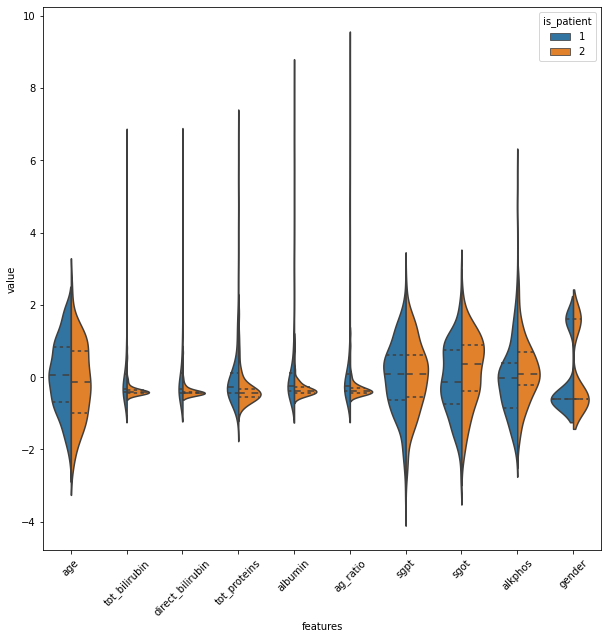

In [11]:
eda_data_dia = eda_y.astype("float")
eda_data = eda_x.astype("float")
eda_data_n_2 = (eda_data - eda_data.mean().astype("float")) / (eda_data.std().astype("float"))              # standardization
eda_data = pd.concat([eda_y,eda_data_n_2],axis=1)
eda_data = pd.melt(eda_data,id_vars="is_patient",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="is_patient", data=eda_data,split=True, inner="quart")
plt.xticks(rotation=45);



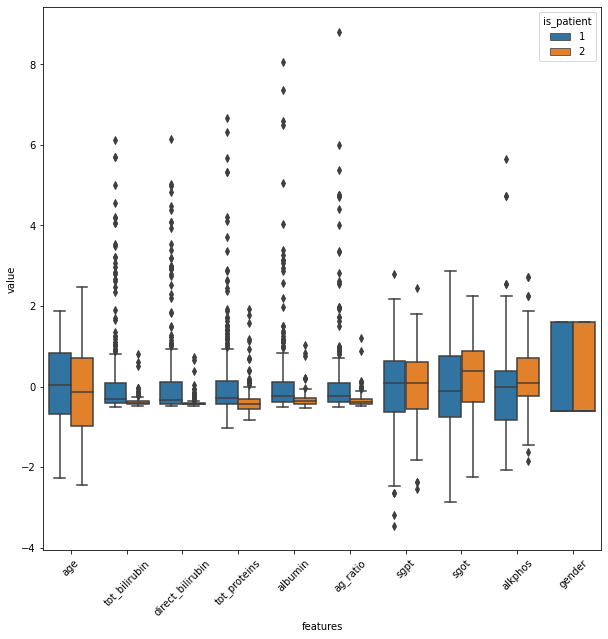

In [12]:
eda_data_dia = eda_y
eda_data = eda_x
eda_data_n_2 = (eda_data - eda_data.mean()) / (eda_data.std())              # standardization
eda_data = pd.concat([eda_y,eda_data_n_2],axis=1)
eda_data = pd.melt(eda_data,id_vars="is_patient",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="is_patient", data=eda_data)
plt.xticks(rotation=45);


<Figure size 1800x1800 with 0 Axes>

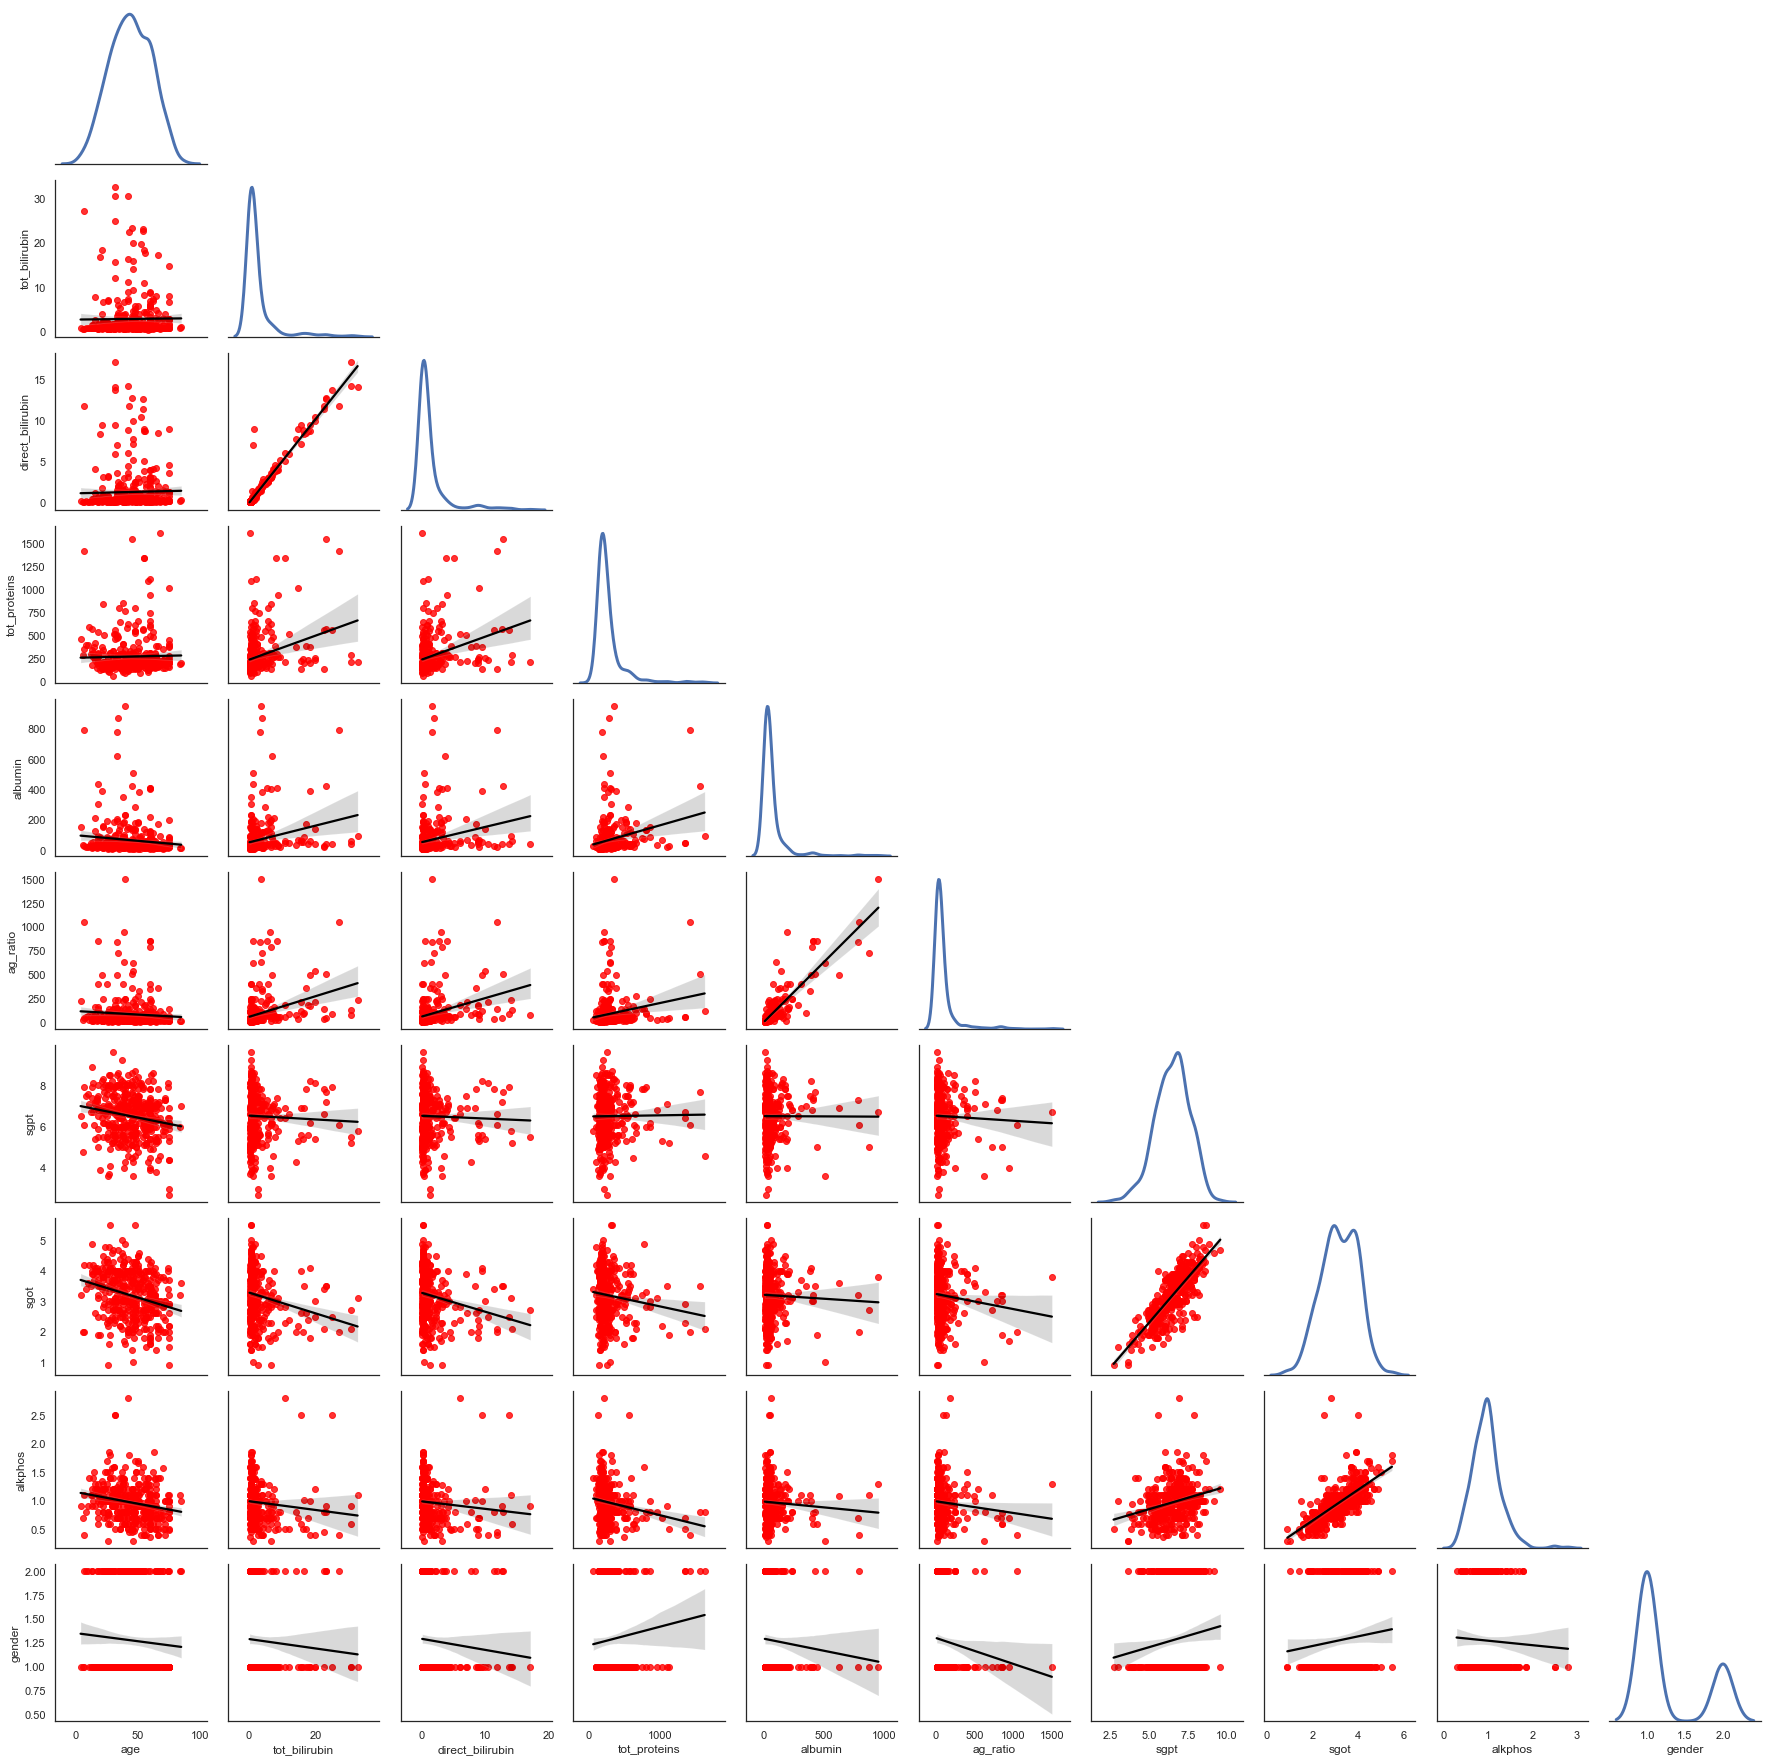

In [13]:
plt.figure(figsize=(25,25))
sns.set(style="white")
g = sns.PairGrid(eda_x, diag_sharey=False,corner=True);
g.map_lower(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "black"});
g.map_diag(sns.kdeplot, lw=3);


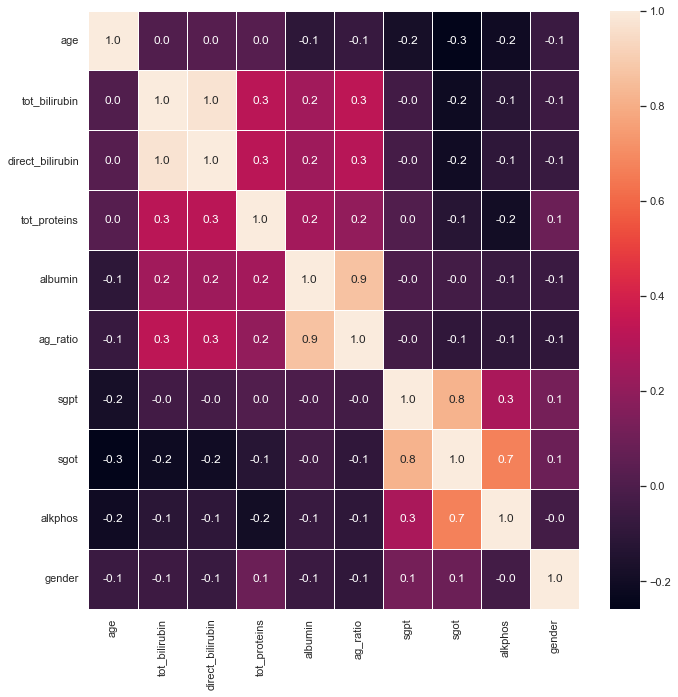

In [14]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(eda_x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('heatmap.jpg',bbox_inches='tight', dpi=300)